<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/seta_girando_fasor_junto_grafico_seno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

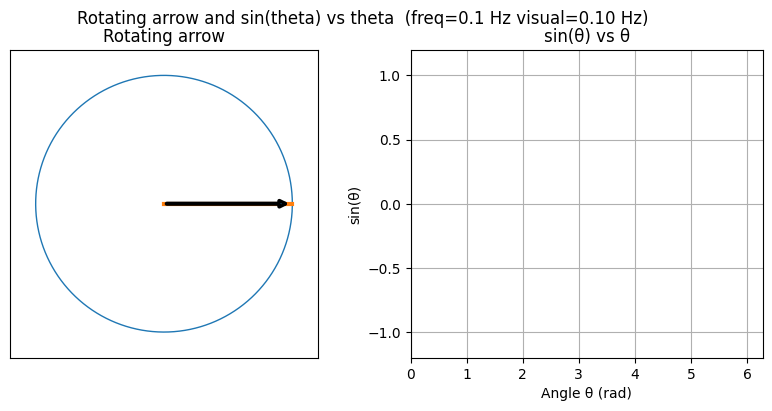

In [4]:
# Colab-ready: rotating arrow animation (clock-like)
# Comments are in English, as requested.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# --------- Parameters you can edit ----------
freq = 0.1          # Hz (physical rotation frequency)
visual_scale = 1.0  # scale down visual speed; 60 Hz / 60 = 1 Hz on screen
duration_s = 10.0     # seconds of video
fps = 20             # frames per second for the animation
radius = 1.0         # arrow length
# -------------------------------------------

# Derived quantities
omega_physical = 2.0 * np.pi * freq                 # rad/s (physical)
omega_visual = omega_physical / visual_scale        # rad/s (visualized)
n_frames = int(duration_s * fps)

# Set up figure
# Figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(f"Rotating arrow and sin(theta) vs theta  (freq={freq} Hz visual={freq/visual_scale:.2f} Hz)")

# ---- Left: rotating arrow ----
ax1.set_aspect("equal")
ax1.set_xlim(-1.2*radius, 1.2*radius)
ax1.set_ylim(-1.2*radius, 1.2*radius)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Rotating arrow")

theta_circle = np.linspace(0, 2*np.pi, 300)
ax1.plot(radius*np.cos(theta_circle), radius*np.sin(theta_circle), lw=1)
shaft, = ax1.plot([0, radius], [0, 0], lw=3)
head = ax1.annotate("", xy=(radius, 0), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="-|>", lw=3))

# ---- Right: sin(theta) vs theta ----
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(-1.2, 1.2)
ax2.set_xlabel("Angle θ (rad)")
ax2.set_ylabel("sin(θ)")
ax2.grid(True)
ax2.set_title("sin(θ) vs θ")

line_sin, = ax2.plot([], [], lw=2)
dot_sin, = ax2.plot([], [], 'ro')

theta_vals = []
sin_vals = []



In [5]:
def update(i):
    t = i / fps
    theta = (omega_visual * t) % (2*np.pi)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # update arrow
    shaft.set_data([0, x], [0, y])
    head.xy = (x, y)

    # update sin plot
    theta_vals.append(theta)
    sin_vals.append(np.sin(theta))
    line_sin.set_data(theta_vals, sin_vals)
    dot_sin.set_data([theta], [np.sin(theta)])

    return shaft, head, line_sin, dot_sin

anim = FuncAnimation(fig, update, frames=n_frames, interval=10000/fps, blit=True)


In [6]:
plt.tight_layout()
# Display as HTML5 video (more reliable than jshtml in Colab)
html_video = anim.to_html5_video()
plt.close(fig)
display(HTML(html_video))

# Notes:
# - If freq = 60 Hz and fps = 60, without visual_scale you would alias (arrow looks static),
#   because angle step per frame is 2π. visual_scale prevents this.
# - To see true-speed 60 Hz on a high-speed display, set visual_scale = 1.0 and increase fps,
#   but typical monitors will still show aliasing.

<Figure size 640x480 with 0 Axes>